In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import yaml
mpl.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv("../../Titeseq/results/Kds/cleaned_Kds_RBD_ACE2.tsv", dtype={"geno":"str"}, sep="\t")

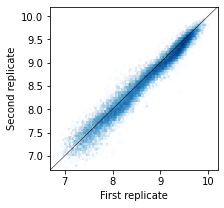

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.hexbin(x=df["log10Kd_a"], y=df["log10Kd_b"],
                  bins='log', cmap="Blues")
ax.plot([6, 11], [6, 11], color="k", lw=0.5)
ax.set_xlim((6.7, 10.2))
ax.set_ylim((6.7, 10.2))
ax.set_ylabel("Second replicate")
ax.set_xlabel("First replicate")
plt.savefig("../Figures/SI_QC_A.pdf")

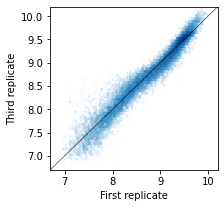

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.hexbin(x=df["log10Kd_a"], y=df["log10Kd_x"],
                  bins='log', cmap="Blues")
ax.plot([6, 11], [6, 11], color="k", lw=0.5)
ax.set_xlim((6.7, 10.2))
ax.set_ylim((6.7, 10.2))
ax.set_ylabel("Third replicate")
ax.set_xlabel("First replicate")
plt.savefig("../Figures/SI_QC_B.pdf")

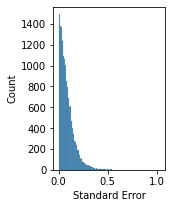

In [6]:
fig, ax = plt.subplots(figsize=(2, 3))
df["Standard Error"] = np.abs(df["log10Kd_a"] - df["log10Kd_x"])/ np.sqrt(2)
sns.histplot(df["Standard Error"])
plt.savefig("../Figures/SI_QC_C.pdf")

In [15]:
import scipy.stats

dfst = df.dropna(subset=["log10Kd_a", "log10Kd_x"])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dfst["log10Kd_a"], dfst["log10Kd_x"])
print(r_value**2)

0.9470690579975944


In [19]:
np.nanmean(np.std(df[["log10Kd_a", "log10Kd_b", "log10Kd_x"]].to_numpy(),axis=1)/np.sqrt(3))

0.04525625560551127